In [1]:
# importing libraries
import pandas as pd #Easily handles missing data,It provides an efficient way to slice the data,It includes a powerful time series tool to work
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading dataset
data = pd.read_csv('data.csv',encoding= 'unicode_escape')

In [3]:
data

,STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident,Accident_Severity
0,ANDHRA PRADESH,Anantapur,A Narayanapura,2016,Jan,20,High,Car over speed and hit to road crossing Pedest...,Tempo/Vans (Government),23,12,30,High
1,ANDHRA PRADESH,Kakkalapalle,Agaram,2016,Feb,2,High,Fault of other vehicle while crossing the road...,Jeep (Government),25,20,31,High
2,ANDHRA PRADESH,Narayanapuram,Banasavadi,2016,Mar,1,Low,Two wheeler over speed and hit to two wheeler,Jeep (Private),5,1,10,Low
3,ANDHRA PRADESH,Papampeta,Basavanapura,2016,Apr,5,High,Fault of road crossing pedestrian,Car (Government),10,4,21,Medium
4,ANDHRA PRADESH,Yenumalapalle,Bellanduru,2016,May,6,High,Truck over speed and hit to Truck,Bicycle,38,23,40,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,WEST BENGAL,Shantipur,Marathahalli,2020,September,23,Low,Car over speed,Total Jeep,9,23,25,Low
736,WEST BENGAL,Dankuni,New Tippasandara,2020,September,21,Low,LCV over speed and hit to Car,Total Car,5,2,4,Low
737,WEST BENGAL,Shantipur,Other,2020,September,12,Medium,Mini truck crushed with school bus. Negligent ...,Truck/Lorry (Government),6,3,5,Medium
738,WEST BENGAL,Dankuni,other,2020,September,31,Medium,Drunk & Drive,Truck/Lorry (Private),7,7,8,Medium


In [4]:
data["STATE"].unique()

array(['ANDHRA PRADESH', 'A & N ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI (UT)', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [5]:
data["City"].unique()

array(['Anantapur', 'Kakkalapalle', 'Narayanapuram', 'Papampeta',
       'Yenumalapalle', 'Avilala', 'Mangalam', 'Mangasamudram',
       'Murakambattu', 'Perur', 'Arempudi', 'Chidiga', 'Morampudi',
       'Chennamukkapalle', 'Dommara Nandyala', 'Mangampeta',
       'Modameedipalle', 'Nagireddipalle', 'Veparala', 'Bambooflat',
       'Garacharma', 'Port Blair', 'Prothrapur', 'Diglipur', 'Mayabunder',
       'Tusnabad', 'Indira Point', 'Swaraj Dweep',
       'Zonal Anthropological Museum', 'Cellular Jail', 'Itanagar',
       'East Siang district', 'Ziro', 'Bomdila', 'Jairampur',
       'Naharlagun', 'Deomali', 'Seppa', 'Changlang', 'Bordumsa', 'Anini',
       'Vijoynagar', 'Boleng', 'Chowkham', 'Mechuka',
       'Banderdawa Papum Pare', 'Lazu', 'Hunli', 'Nirjuli', 'Namsang',
       'Dambuk', 'Guwahati', 'Silchar', 'Dibrugarh', 'Jorhat', 'Nagaon',
       'Tinsukia', 'Tezpur', 'Bongaigaon', 'Diphu', 'Dhubri\xa0',
       'North Lakhimpur', 'Karimganj', 'Golaghat', 'Lanka', 'Hojai',
       '

In [6]:
data["Area"].unique()

array(['A Narayanapura', 'Agaram', 'Banasavadi', 'Basavanapura',
       'Bellanduru', 'Benniganahalli', 'Bharathi Nagar', 'BTM Layout',
       'C V Raman Nagar', 'Chickpete', 'Devasandra',
       'Dharmaraya Swamy Temple', 'Dodda Nekkundi', 'Domlur',
       'Garudachar Playa', 'Gurappanapalya', 'Hagadur', 'HAL Airport',
       'Halsoor', 'Hemmigepura', 'Horamavu', 'Hoysala Nagar',
       'HSR Layout', 'Hudi', 'J P Nagar', 'Jaraganahalli',
       'Jayanagar East', 'Jeevanbhima Nagar', 'Jogupalya', 'K R Puram',
       'Kacharkanahalli', 'Kadugodi', 'Kammanahalli', 'Konena Agrahara',
       'Madivala', 'Marathahalli', 'New Tippasandara', 'Other', 'other',
       'Ramamurthy Nagar', 'Sampangiram Nagar', 'Sarakki',
       'Shantala Nagar', 'Singasandra', 'Sudham Nagara', 'Varthuru',
       'Vasanthpura', 'Vijnana Nagar', 'Vijnanapura', 'Yelchenahalli'],
      dtype=object)

In [7]:
data["Pothole_Severity"].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [8]:
data["Typeofvehicle"].unique()

array(['Car over speed and hit to road crossing Pedestrian',
       'Fault of other vehicle while crossing the road two wheeler car hit',
       'Two wheeler over speed and hit to two wheeler',
       'Fault of road crossing pedestrian',
       'Truck over speed and hit to Truck',
       'Truck over speed and Hit to the Two wheeler',
       'Two wheeler over speed and hit to Tractor',
       'Two wheeler over speed and hit to Two wheeler',
       'car over speed and hit to two wheeler',
       'Car over speed self accident',
       'Two wheeler self accident Drunk & Drive',
       'Car Hit to the Multi axle', 'Bike', 'T.T', 'Car over speed',
       'Car self accident defect in mechanical condition',
       'Bike over speed and Vehicle out of control hit to the lorry',
       'Car', 'Over Speed of Car', 'Multi axle over speed and hit to car',
       'Truck over speed and hit LCV', 'Tata Ace hit to the car',
       'Car over speed and hit to Animal (Cow)',
       'Truck over speed and hi

In [9]:
#printing starting five lines of dataset
data.head()

,STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident,Accident_Severity
0,ANDHRA PRADESH,Anantapur,A Narayanapura,2016,Jan,20,High,Car over speed and hit to road crossing Pedest...,Tempo/Vans (Government),23,12,30,High
1,ANDHRA PRADESH,Kakkalapalle,Agaram,2016,Feb,2,High,Fault of other vehicle while crossing the road...,Jeep (Government),25,20,31,High
2,ANDHRA PRADESH,Narayanapuram,Banasavadi,2016,Mar,1,Low,Two wheeler over speed and hit to two wheeler,Jeep (Private),5,1,10,Low
3,ANDHRA PRADESH,Papampeta,Basavanapura,2016,Apr,5,High,Fault of road crossing pedestrian,Car (Government),10,4,21,Medium
4,ANDHRA PRADESH,Yenumalapalle,Bellanduru,2016,May,6,High,Truck over speed and hit to Truck,Bicycle,38,23,40,High


In [10]:
#printing last five lines of dataset
data.tail()

,STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident,Accident_Severity
735,WEST BENGAL,Shantipur,Marathahalli,2020,September,23,Low,Car over speed,Total Jeep,9,23,25,Low
736,WEST BENGAL,Dankuni,New Tippasandara,2020,September,21,Low,LCV over speed and hit to Car,Total Car,5,2,4,Low
737,WEST BENGAL,Shantipur,Other,2020,September,12,Medium,Mini truck crushed with school bus. Negligent ...,Truck/Lorry (Government),6,3,5,Medium
738,WEST BENGAL,Dankuni,other,2020,September,31,Medium,Drunk & Drive,Truck/Lorry (Private),7,7,8,Medium
739,WEST BENGAL,Dankuni,Ramamurthy Nagar,2020,September,13,High,Two wheeler over speed self accident,Bus (Government),9,23,25,High


In [11]:
#printing samples of dataset
data.sample(10)

,STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident,Accident_Severity
481,MEGHALAYA,Umlyngka,Kadugodi,2019,May,4,Medium,Two wheeler over speed and hit to two wheeler,Total Tempo/Vans,5,7,8,Medium
602,RAJASTHAN,Bikaner,Banasavadi,2020,November,22,Low,Two wheeler over speed Self accident,Truck/Lorry (Government),3,23,40,Low
667,TRIPURA,Dharmanagar,HAL Airport,2020,March,17,High,Bike,Car (Government),11,12,30,High
235,GUJARAT,Patan,Marathahalli,2017,Aug,13,Low,Car over speed and hit to Two wheeler,Truck/Lorry (Private),5,2,7,Low
321,JHARKHAND,Dhanbad,Hoysala Nagar,2018,Dec,23,Low,Bike over speed and vehicle skidding,Tempo/Vans (Government),9,23,25,Low
645,TAMIL NADU,Madurai,Varthuru,2020,January,2,High,Two wheeler over speed and hit to two wheeler,Tempo/Vans (Government),12,20,31,High
588,PUNJAB,Amritsar,other,2019,October,20,Medium,LCV over speed and hit to Two wheeler,Jeep (Government),21,34,50,Medium
237,GUJARAT,Ahmedabad,Other,2017,Aug,23,Medium,Bike over speed hit to car,Tempo/Vans (Government),12,21,20,Medium
628,SIKKIM,Jorethang,Jogupalya,2020,December,30,Medium,Truck lost control and hit to the car. Neglige...,Tempo/Vans (Government),3,21,20,Medium
553,PUDUCHERRY,Yanam,Basavanapura,2019,September,12,High,Bike Drunk & Drive,Others (Please Specify),12,20,31,High


In [12]:
#To check missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   STATE              740 non-null    object
 1   City               740 non-null    object
 2   Area               740 non-null    object
 3   Year               740 non-null    int64 
 4   Month              740 non-null    object
 5   Day                740 non-null    int64 
 6   Pothole_Severity   740 non-null    object
 7   Typeofvehicle      740 non-null    object
 8   Causes             740 non-null    object
 9   No_of_death        740 non-null    int64 
 10  No_of_injured      740 non-null    int64 
 11  No_of_accident     740 non-null    int64 
 12  Accident_Severity  740 non-null    object
dtypes: int64(5), object(8)
memory usage: 75.3+ KB


In [13]:
#no missing data

In [14]:
# It will describe data
data.describe()

,Year,Day,No_of_death,No_of_injured,No_of_accident
count,740.000000,740.000000,740.000000,740.000000,740.000000
mean,2018.098649,14.425676,11.143243,15.485135,21.721622
std,1.469491,7.726631,6.984888,10.330063,13.102730
min,2016.000000,1.000000,1.000000,1.000000,3.000000
25%,2017.000000,8.000000,5.000000,3.000000,8.000000
50%,2019.000000,14.000000,10.500000,21.000000,22.000000
75%,2019.000000,20.000000,17.000000,23.000000,30.000000
max,2020.000000,31.000000,38.000000,34.000000,50.000000


# Data preprocessing

In [15]:
# Categorical data handling(It will convert string to numerical value)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

testing = data

STATE = le.fit_transform(data.STATE)
City = le.fit_transform(data.City)
Area = le.fit_transform(data.Area)
Pothole_Severity = le.fit_transform(data.Pothole_Severity)
Typeofvehicle = le.fit_transform(data.Typeofvehicle)
Causes = le.fit_transform(data.Causes)
Accident_Severity = le.fit_transform(data.Accident_Severity)
Month = le.fit_transform(data.Month)

testing['STATE'] = STATE
testing['City'] = City
testing['Area'] = Area
testing['Pothole_Severity'] = Pothole_Severity
testing['Typeofvehicle'] = Typeofvehicle
testing['Causes'] = Causes
testing['Accident_Severity'] = Accident_Severity
testing['Month'] = Month


In [16]:
data

,STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident,Accident_Severity
0,1,13,0,2016,8,20,0,85,9,23,12,30,0
1,1,178,1,2016,6,2,0,150,5,25,20,31,0
2,1,266,3,2016,14,1,1,296,6,5,1,10,1
3,1,280,4,2016,0,5,0,151,3,10,4,21,2
4,1,392,5,2016,16,6,0,262,0,38,23,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,34,335,35,2020,22,23,1,54,14,9,23,25,1
736,34,91,36,2020,22,21,1,164,13,5,2,4,1
737,34,335,37,2020,22,12,2,185,17,6,3,5,2
738,34,91,49,2020,22,31,2,127,18,7,7,8,2


In [17]:
#independent and dependent variable
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

SyntaxError: invalid syntax (1793623767.py, line 3)

In [ ]:
# printing independent variables
X

,STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident
0,1,13,0,2016,8,20,0,85,9,23,12,30
1,1,178,1,2016,6,2,0,150,5,25,20,31
2,1,266,3,2016,14,1,1,296,6,5,1,10
3,1,280,4,2016,0,5,0,151,3,10,4,21
4,1,392,5,2016,16,6,0,262,0,38,23,40
...,...,...,...,...,...,...,...,...,...,...,...,...
735,34,335,35,2020,22,23,1,54,14,9,23,25
736,34,91,36,2020,22,21,1,164,13,5,2,4
737,34,335,37,2020,22,12,2,185,17,6,3,5
738,34,91,49,2020,22,31,2,127,18,7,7,8


In [ ]:
# printing dependent variables
y

0      0
1      0
2      1
3      2
4      0
      ..
735    1
736    1
737    2
738    2
739    0
Name: Accident_Severity, Length: 740, dtype: int32

In [ ]:
# spliting up to testing and training dataset
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train)

     STATE  City  Area  Year  Month  Day  Pothole_Severity  Typeofvehicle  \
104      5   247     5  2016      0   14                 0             29   
195      9   182    44  2017     12   10                 0             45   
444     20   244    43  2019      0   14                 1            332   
3        1   280     4  2016      0    5                 0            151   
470     22   273    21  2019     16   18                 1            107   
..     ...   ...   ...   ...    ...  ...               ...            ...   
578     27   247    28  2019     20   18                 2             15   
53       2   240     4  2016      6    9                 0            318   
350     16    79     0  2018      4   22                 0            168   
79       3   263    29  2016     14   17                 0            284   
520     24   287    21  2019     13   11                 1             50   

     Causes  No_of_death  No_of_injured  No_of_accident  
104      16      

In [ ]:
#checking X_train
X_train

,STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident
104,5,247,5,2016,0,14,0,29,16,17,21,22
195,9,182,44,2017,12,10,0,45,9,19,34,40
444,20,244,43,2019,0,14,1,332,10,3,21,20
3,1,280,4,2016,0,5,0,151,3,10,4,21
470,22,273,21,2019,16,18,1,107,18,2,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...
578,27,247,28,2019,20,18,2,15,9,20,4,21
53,2,240,4,2016,6,9,0,318,3,12,21,20
350,16,79,0,2018,4,22,0,168,5,19,2,7
79,3,263,29,2016,14,17,0,284,9,20,12,14


In [ ]:
#checking y_train
y_train

104    0
195    0
444    1
3      2
470    1
      ..
578    2
53     0
350    0
79     0
520    1
Name: Accident_Severity, Length: 592, dtype: int32

In [ ]:
# printing data after traing data
data

,STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident,Accident_Severity
0,1,13,0,2016,8,20,0,85,9,23,12,30,0
1,1,178,1,2016,6,2,0,150,5,25,20,31,0
2,1,266,3,2016,14,1,1,296,6,5,1,10,1
3,1,280,4,2016,0,5,0,151,3,10,4,21,2
4,1,392,5,2016,16,6,0,262,0,38,23,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,34,335,35,2020,22,23,1,54,14,9,23,25,1
736,34,91,36,2020,22,21,1,164,13,5,2,4,1
737,34,335,37,2020,22,12,2,185,17,6,3,5,2
738,34,91,49,2020,22,31,2,127,18,7,7,8,2


In [ ]:
#checking X_test
X_test

,STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident
569,26,276,20,2019,20,12,1,283,15,2,23,40
327,15,98,27,2018,4,15,2,106,1,5,2,7
277,13,229,27,2018,19,9,2,340,18,12,20,31
19,0,27,20,2016,8,15,1,205,3,2,2,4
423,19,76,23,2019,14,5,2,293,9,20,22,23
...,...,...,...,...,...,...,...,...,...,...,...,...
42,2,61,41,2016,6,22,2,178,6,5,2,4
428,20,358,28,2019,14,21,2,308,12,2,21,30
384,18,193,34,2019,8,14,2,253,8,17,21,20
732,34,31,32,2020,22,6,1,259,16,5,2,4


In [ ]:
#checking y_test
y_test

569    1
327    2
277    2
19     1
423    2
      ..
42     0
428    2
384    2
732    1
634    2
Name: Accident_Severity, Length: 148, dtype: int32

# Navie bayes algorithm

In [ ]:
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
BernNB = BernoulliNB(binarize=.1)
BernNB.fit(X_train,y_train)
print(BernNB)
y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred)*100)
score_nb = accuracy_score(y_expect,y_pred)*100

BernoulliNB(binarize=0.1)
62.83783783783784


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[40  4  0]
 [ 0 53  0]
 [ 1 50  0]]


# KNN algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_expect,y_pred)*100)
score_knn = accuracy_score(y_expect,y_pred)*100

[[13 17 14]
 [17 21 15]
 [25 18  8]]
              precision    recall  f1-score   support

           0       0.24      0.30      0.26        44
           1       0.38      0.40      0.39        53
           2       0.22      0.16      0.18        51

    accuracy                           0.28       148
   macro avg       0.28      0.28      0.28       148
weighted avg       0.28      0.28      0.28       148

28.37837837837838


In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

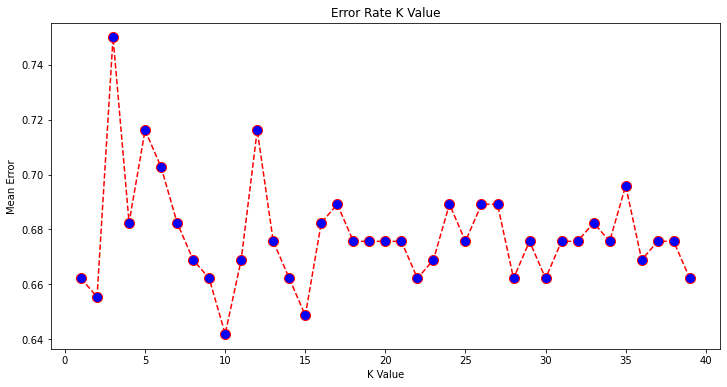

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# KMean- Cluster algorithm

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
raw_data = make_blobs(n_samples = 200, n_features = 2, centers = 4, cluster_std = 1.8)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=4)

In [ ]:
model.fit(raw_data[0])

KMeans(n_clusters=4)

In [ ]:
model.labels_

array([3, 1, 2, 2, 0, 0, 1, 3, 0, 0, 3, 1, 0, 0, 3, 1, 0, 3, 1, 2, 0, 3,
       0, 1, 0, 1, 3, 3, 3, 0, 0, 0, 2, 2, 1, 3, 0, 1, 2, 0, 0, 0, 2, 2,
       1, 0, 3, 1, 2, 2, 1, 3, 3, 2, 3, 3, 1, 2, 1, 2, 0, 2, 0, 0, 1, 2,
       0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 3, 3, 3, 0, 2, 2, 0, 1, 2, 0, 0, 1,
       1, 0, 1, 3, 2, 1, 1, 2, 2, 1, 3, 0, 1, 2, 0, 2, 0, 1, 2, 1, 1, 3,
       3, 3, 1, 0, 2, 2, 3, 2, 0, 2, 3, 1, 1, 2, 0, 3, 3, 3, 2, 0, 0, 1,
       0, 3, 0, 3, 0, 0, 3, 0, 0, 1, 2, 1, 3, 3, 2, 2, 1, 2, 1, 3, 0, 3,
       3, 1, 0, 2, 1, 3, 1, 0, 1, 1, 2, 1, 1, 0, 0, 3, 0, 1, 2, 1, 1, 2,
       1, 3, 2, 2, 3, 2, 0, 1, 2, 3, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2,
       1, 0])

In [ ]:
model.cluster_centers_

array([[ -5.29233894,  -7.35101499],
       [ -5.12791337,   4.39466304],
       [ -2.39171997,  -0.3805101 ],
       [ -4.667642  , -10.49500219]])

28.37837837837838


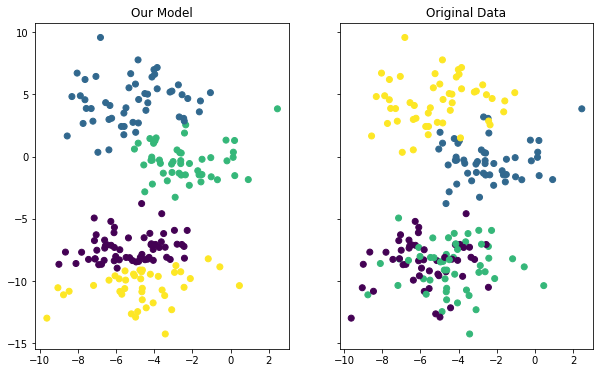

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')

ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=model.labels_)

ax2.set_title('Original Data')

ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1])

print(accuracy_score(y_expect,y_pred)*100)
score_KMeans = accuracy_score(y_expect,y_pred)*100

# The accuracy score achieved using algorithms

In [ ]:
#scores = [score_svm,score_svm1,score_dt,score_nb]
#algorithms = ["svm l","svm r","Decision tree","naive_bayes"]    

scores = [score_nb,score_knn,score_KMeans]
algorithms = ["naive_bayes","KNeighborsClassifier","KMeans"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using naive_bayes is: 62.83783783783784 %
The accuracy score achieved using KNeighborsClassifier is: 28.37837837837838 %
The accuracy score achieved using KMeans is: 28.37837837837838 %


# Plot Graph 

c:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

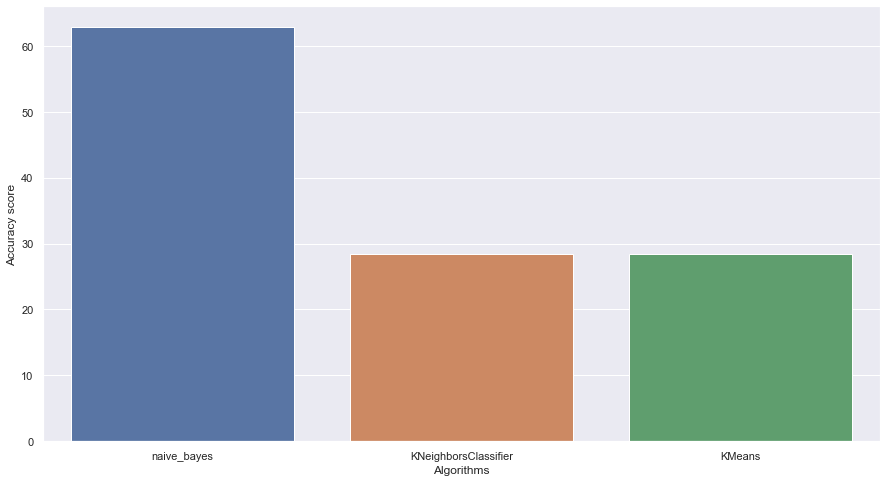

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [ ]:
X_train

,STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident
104,5,247,5,2016,0,14,0,29,16,17,21,22
195,9,182,44,2017,12,10,0,45,9,19,34,40
444,20,244,43,2019,0,14,1,332,10,3,21,20
3,1,280,4,2016,0,5,0,151,3,10,4,21
470,22,273,21,2019,16,18,1,107,18,2,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...
578,27,247,28,2019,20,18,2,15,9,20,4,21
53,2,240,4,2016,6,9,0,318,3,12,21,20
350,16,79,0,2018,4,22,0,168,5,19,2,7
79,3,263,29,2016,14,17,0,284,9,20,12,14


In [ ]:
# using independent variables predicting dependent variable 
STATE = float(input('enter STATE:'))
City = float(input('enter City:'))
Area = float(input('enter Area:')) 
Year = float(input('enter Year:')) 
Month = float(input('enter Month:'))
Day = float(input('enter Day:'))
Pothole_Severity = float(input('enter Pothole_Severity:')) 
Typeofvehicle = float(input('enter Typeofvehicle:'))
Causes = float(input('enter Causes:'))
No_of_death = float(input('enter No_of_death:'))
No_of_injured = float(input('enter No_of_injured:'))
No_of_accident = float(input('enter No_of_accident:'))


p_n = BernNB.predict([[STATE,City,Area,Year,Month,Day,Pothole_Severity,Typeofvehicle,Causes,No_of_death,No_of_injured,No_of_accident]])
print('Accident_Severity:',p_n[0])

Accident_Severity: 0


c:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [ ]:
from tkinter import * 
from tkinter import ttk

root = Tk()
root.title('Accident Prediction')
root.geometry('850x650')
root.configure(background="LightYellow4")

var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="LightYellow4")
var.set('Accident Prediction System')
label.grid(row=0,columnspan=6)

def rule_file():
    root1=Tk()
    root1.title("login page")
    root1.geometry('600x500')
    root1.configure(background="LightYellow4")
    def login():
        user = E.get()
        password = E1.get()
        admin_login(user,password)
    L=Label(root1, text = "Username",bd=8,background="LightYellow4",height=1,padx=16,pady=16,font=('arial',16,'bold'),width=10,).grid(row = 0,column=0)
    E=Entry(root1)
    E.grid(row = 0, column = 1)
    L1=Label(root1, text = "Password",bd=8,background="LightYellow4",height=1,padx=16,pady=16,font=('arial',16,'bold'),width=10,).grid(row = 1,column=0)
    E1=Entry(root1,show="*")
    E1.grid(row = 1, column = 1)
    B1=Button(root1,text="Login",width=4,height=1,command=login,bd=8,background="LightYellow4")
    B1.grid(row = 2, column = 1)
    root1.mainloop()

def admin_login(user,password):
    if user == "admin" and password == "admin":
        Rule_display()

def Rule_display():
    root1 = Tk()
    root1.title("Rules")
    root1.geometry('800x800')
    root1.configure(background="LightYellow4")

    label_1 = ttk.Label(root1, text ='STATE',font=("Helvetica", 16),background="snow4")
    label_1.grid(row=11,column=0)
    
# Entry_1= Entry(root)
# Entry_1.grid(row=11,column=1)

    options_state = StringVar(root1)
    options_state.set("Select Option") # default value
    om1 = ttk.OptionMenu(root1, options_state,'ANDHRA PRADESH', 'A & N ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI','DAMAN & DIU', 'DELHI (UT)', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA','KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA','PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL')
    om1.grid(row=11,column=1) 

    label_2 = ttk.Label(root1, text ='City',font=("Helvetica", 16),background="snow4")
    label_2.grid(row=12,column=0)
    
# Entry_2 = Entry(root)
# Entry_2.grid(row=12,column=1)

    options_city = StringVar(root1)
    options_city.set("Select Option") # default value
    om2 = ttk.OptionMenu(root1, options_city,'Anantapur','Kakkalapalle','Narayanapuram','Papampeta',
       'Yenumalapalle', 'Avilala', 'Mangalam', 'Mangasamudram','Murakambattu', 'Perur', 'Arempudi', 'Chidiga', 'Morampudi',
       'Chennamukkapalle', 'Dommara Nandyala', 'Mangampeta','Modameedipalle', 'Nagireddipalle', 'Veparala', 'Bambooflat',
       'Garacharma', 'Port Blair', 'Prothrapur', 'Diglipur', 'Mayabunder','Tusnabad', 'Indira Point', 'Swaraj Dweep',
       'Zonal Anthropological Museum', 'Cellular Jail', 'Itanagar','East Siang district', 'Ziro', 'Bomdila', 'Jairampur',
       'Naharlagun', 'Deomali', 'Seppa', 'Changlang', 'Bordumsa', 'Anini','Vijoynagar', 'Boleng', 'Chowkham', 'Mechuka',
       'Banderdawa Papum Pare', 'Lazu', 'Hunli', 'Nirjuli', 'Namsang','Dambuk', 'Guwahati', 'Silchar', 'Dibrugarh', 'Jorhat', 'Nagaon',
       'Tinsukia', 'Tezpur', 'Bongaigaon', 'Diphu', 'Dhubri\xa0','North Lakhimpur', 'Karimganj', 'Golaghat', 'Lanka', 'Hojai',
       'Mangaldai', 'Kokrajhar', 'Morigaon', 'Nalbari', 'Rangia', 'Patna','Muzaffarpur', 'Gaya', 'Bihar Sharif', 'Nalanda', 'Begusarai',
       'Munger', 'Bodh Gaya', 'Katihar', 'Hajipur', 'Chapra', 'Bettiah','Siwan', 'Danapur', 'Samastipur', 'Khagaul', 'Bagaha',
       'Lakhisarai', 'Forbesganj', 'Sherghati', 'Daudnagar', 'Jalandhar','Patiala', 'Mohali', 'Amritsar', 'Ludhiana', 'Moga', 'Khanna',
       'Phagwara', 'Abohar', 'Sri Muktsar Sahib', 'Rajpura', 'Firozpur','Kapurthala', 'Faridkot', 'Sunam', 'Raipur', 'Bilaspur', 'Korba',
       'Bhilai', 'Ambikapur', 'Jagdalpur', 'Durg', 'Rajnandgaon','Ratanpur', 'Bemetara', 'Gaurella', 'Saraipali', 'Bilha',
       'Gharghoda', 'Janjgir', 'Kurud', 'Naya Raipur', 'Arang', 'Pendra','Dhamdha', 'Bhatapara', 'Silvassa', 'Masat', 'Marwad', 'Dunetha',
       'Daman', 'Dadra', 'Bhimpore', 'Diu', 'Kachigam', 'Dadhel','Naroli', 'Delhi Cantonment', 'Faridabad', 'Agra', 'Chanakyapuri',
       'Karawal Nagar', 'Kondli', 'Vasant Kunj', 'Pitam Pura','Najafgarh', 'Kanjhawala', 'Kirari Suleman Nagar', 'Bawana','Jafrabad', 'Deoli', 'Shahpur Jat', 'Mundka', 'Siraspur',
       'Bicholim', 'Canacona', 'Ponda', 'Pernem', 'Quepem', 'Sanguem','Sanquelim', 'Cuncolim', 'Mapusa', 'Mormugao', 'Ahmedabad',
       'Rajkot', 'Surat', 'Vadodara', 'Porbandar', 'Bharuch', 'Patan','Navsari', 'Gurugram', 'Rohtak', 'Hisar', 'Panipat', 'Ambala','Karnal', 'Sonipat', 'Jind', 'Yamuna Nagar', 'Sirsa',
       'Kurukshetra', 'Shimla', 'Dharamsala', 'Solan', 'Mandi','Palampur', 'Baddi', 'Nahan', 'Paonta Sahib\xa0', 'Chamba', 'Una',
       'Kullu', 'Hamirpur', 'Parw?noo', 'Santokhgarh', 'Rohru', 'Theog',
       'Gagret', 'Srinagar', 'Jammu', 'Anantnag', 'Udhampur', 'Baramula','Kathua', 'Ganderbal', 'Punch', 'Kulgam', 'Doda', 'Akhnoor','Duru Verinag', 'Sopore', 'Dumka', 'Hazaribagh', 'Dhanbad',
       'Jamshedpur', 'Bokaro Steel City', 'Ranchi', 'Daltonganj','Deoghar', 'Giridih', 'Phusro', 'Gumia', 'Bermo', 'Bangalore',
       'Darwada', 'Davanagere', 'Hubli', 'Bagalkote', 'Gulburga','Mysore', 'Mangalore', 'Udupi', 'Ranebennur', 'Chitradurga',
       'Tumkur', 'sira', 'Shivamogga', 'Bidar', 'Ballary', 'Bijapur',
       'Ganavati', 'mandya', 'Chikmangalore', 'Thiruvananthapuram','Kozhikode', 'Kochi', 'Thrissur', 'Kollam', 'Kannur', 'Kasaragod',
       'Vatakara', 'Pathanamthitta', 'Koyilandy', 'Tirur', 'Varkala',
       'Kanhangad', 'Kavaratti', 'Minicoy', 'Amini Island','Minicoy Lakshadweep', 'Bhopal', 'Jabalpur', 'Indore', 'Gwalior',
       'Ujjain', 'Ratlam', 'Sagar', 'Chhindwara', 'Vidisha', 'Satna','Dewas', 'Burhanpur', 'Greater\xa0Mumbai\xa0', 'Pune', 'Nagpur',
       'Nashik', 'Thane', 'Aurangabad', 'Solapur', 'Amaravati', 'Sangli','Bhiwandi-Nizampur', 'Akola', 'Chandrapur', 'Miraj', 'Bishnupur',
       'Thoubal', 'Imphal East\xa0', 'Imphal West\xa0', 'Senapati',
       'Ukhrul', 'Chandel', 'Churachandpur', 'Tamenglong', 'Jiribam','Kangpokpi', 'Kamjong', 'Shillong', 'Shillong\xa0Cantonment',
       'Tura', 'Umlyngka', 'Nongkseh', 'Nongpoh', 'Aizawl', 'Bairabi','Biate', 'Champhai', 'Lawngtlai', 'Lengpui', 'Kolasib', 'Khawhai',
       'Darlawn', 'Mamit', 'Saiha', 'Sairang', 'Saitual', 'Serchhip','Thenzawl', 'Tlabung', 'Vairengte', 'Zawlnuam', 'Hnahthial','Kohima', 'Kuda', 'Longleng', 'Medziphema', 'Peren', 'Kiphire','Bhubaneswar', 'Cuttack', 'Rourkela', 'Berhampur', 'Sambalpur','Puri', 'Balasore', 'Bhadrak', 'Baripada',
       'Thirumalairayanpattinam', 'Puducherry', 'Yanam', 'Villianur',
       'Ozhukarai', 'Manavely', 'Mahé', 'Kurumbapet', 'Bathinda','Hoshiarpur', 'Malerkotla', 'Jaipur', 'Jaisalmer', 'Udaipur',
       'Jodhpur', 'Bikaner', 'Gangtok', 'Gyalshing', 'Jorethang', 'Mangan', 'Namchi', 'Chennai', 'Coimbatore', 'Madurai',
       'Tiruchirapalli', 'Tiruppur', 'Salem', 'Erode', 'Tirunelveli','Agartala', 'Dharmanagar', 'Kailasahar', 'Bishalgarh', 'Ambassa',
       'Kanpur', 'Lucknow', 'Faizabad', 'Gorakhpur', 'Ghaziabad', 'Noida','Saharanpur', 'Dehradun', 'Haldwani-cum-Kathgodam', 'Haridwar','Roorkee', 'Rudrapur', 'Kashipur', 'Rishikesh', 'Kolkata',
       'Asansol', 'Siliguri', 'Durgapur', 'Bardhaman', 'Gaighata','Kharagpur', 'Shantipur', 'Dankuni')
    om2.grid(row=12, column=1)     
    
    label_3 = ttk.Label(root1, text =' Area',font=("Helvetica", 16),background="snow4")
    label_3.grid(row=13,column=0)
    
# Entry_3 = Entry(root)
# Entry_3.grid(row=13,column=1)

    options_area = StringVar(root1)
    options_area.set("Select Option") # default value
    om3 = ttk.OptionMenu(root1, options_area,'A Narayanapura', 'Agaram', 'Banasavadi', 'Basavanapura',
       'Bellanduru', 'Benniganahalli', 'Bharathi Nagar', 'BTM Layout','C V Raman Nagar', 'Chickpete', 'Devasandra',
       'Dharmaraya Swamy Temple', 'Dodda Nekkundi', 'Domlur','Garudachar Playa', 'Gurappanapalya', 'Hagadur', 'HAL Airport',
       'Halsoor', 'Hemmigepura', 'Horamavu', 'Hoysala Nagar','HSR Layout', 'Hudi', 'J P Nagar', 'Jaraganahalli',
       'Jayanagar East', 'Jeevanbhima Nagar', 'Jogupalya', 'K R Puram','Kacharkanahalli', 'Kadugodi', 'Kammanahalli', 'Konena Agrahara',
       'Madivala', 'Marathahalli', 'New Tippasandara', 'Other', 'other','Ramamurthy Nagar', 'Sampangiram Nagar', 'Sarakki',
       'Shantala Nagar', 'Singasandra', 'Sudham Nagara', 'Varthuru','Vasanthpura', 'Vijnana Nagar', 'Vijnanapura', 'Yelchenahalli')
    om3.grid(row=13, column=1) 

    label_4 = ttk.Label(root1, text ='Year',font=("Helvetica", 16),background="snow4")
    label_4.grid(row=14,column=0)
    
    Entry_4= Entry(root1)
    Entry_4.grid(row=14,column=1)

    label_5 = ttk.Label(root1, text ='Month',font=("Helvetica", 16),background="snow4")
    label_5.grid(row=15,column=0)
    
    Entry_5 = Entry(root1)
    Entry_5.grid(row=15,column=1)
    
    
    label_6 = ttk.Label(root1, text ='Day',font=("Helvetica", 16),background="snow4")
    label_6.grid(row=16,column=0)
    
    Entry_6 = Entry(root1)
    Entry_6.grid(row=16,column=1)

    label_7 = ttk.Label(root1, text ='Pothole_Severity',font=("Helvetica", 16),background="snow4")
    label_7.grid(row=17,column=0)
    
    Entry_7= Entry(root1)
    Entry_7.grid(row=17,column=1)


    label_8 = ttk.Label(root1, text ='Typeofvehicle',font=("Helvetica", 16),background="snow4")
    label_8.grid(row=18,column=0)
    
    Entry_8= Entry(root1)
    Entry_8.grid(row=18,column=1)

    label_9 = ttk.Label(root1, text ='Causes',font=("Helvetica", 16),background="snow4")
    label_9.grid(row=19,column=0)
    
    Entry_9= Entry(root1)
    Entry_9.grid(row=19,column=1)

    label_10 = ttk.Label(root1, text ='No_of_death',font=("Helvetica", 16),background="snow4")
    label_10.grid(row=20,column=0)
        
    Entry_10= Entry(root1)
    Entry_10.grid(row=20,column=1)

    label_11 = ttk.Label(root1, text ='No_of_injured',font=("Helvetica", 16),background="snow4")
    label_11.grid(row=21,column=0)
    
    Entry_11= Entry(root1)
    Entry_11.grid(row=21,column=1)

    label_12 = ttk.Label(root1, text ='No_of_accident',font=("Helvetica", 16),background="snow4")
    label_12.grid(row=22,column=0)
    
    Entry_12= Entry(root1)
    Entry_12.grid(row=22,column=1)
    
    def ruleplot():
        import matplotlib.cm as cm
        state = options_state.get()
        if state == 'ANDHRA PRADESH':
            state = 0
        elif state == 'A & N ISLANDS':
            state = 1
        elif state == 'Arunachal Pradesh':
            state = 2
        elif state == 'ASSAM':
            state = 3
        elif state == 'BIHAR':
            state = 4
        elif state == 'CHANDIGARH':
            state = 5
        elif state == 'CHHATTISGARH':
            state = 6
        City = options_city.get()
        if City == 'Anantapur':
            City = 0
        elif City == 'Kakkalapalle':
            City = 1
        elif City == 'Narayanapuram':
            City = 2
        elif City == 'ANANTAPUR':
            City = 3
        elif City == 'Papampeta':
            City = 4
        elif City =='Yenumalapalle':
            City = 5
        elif City == 'Avilala':
            City = 6
        elif City == 'Mangalam':
            City = 7
        elif City == 'Mangasamudram':
            City = 8
        elif City == 'Murakambattu':
            City = 9
        area = options_area.get()
        if area == 'A Narayanapura':
            area = 0
        elif area == 'Agaram':
            area = 1
        elif area == 'Banasavadi':
            area = 2
        elif area == 'Basavanapura':
            area = 3
        elif area == 'Bellanduru':
            area = 4
        elif area =='Benniganahalli':
            area = 5
        elif area == 'C V Raman Nagar':
            area = 6
        elif area == 'Chickpete':
            area = 7
        elif area == 'Devasandra':
            area = 8
        elif area == 'Dharmaraya Swamy Temple':
            area = 9
        print(state,City,Area,)
        Year = Entry_4.get()
        Month = Entry_5.get()
        Day = Entry_6.get()
        Pothole_Severity = Entry_7.get()
        Typeofvehicle = Entry_8.get()
        Causes = Entry_9.get()
        No_of_death = Entry_10.get()
        No_of_injured = Entry_11.get()
        No_of_accident = Entry_12.get()
        out = BernNB.predict([[float(STATE),float(City),float(Area),float(Year),float(Month), float(Day),float(Pothole_Severity),float(Typeofvehicle),float(Causes),
        float(No_of_death),float(No_of_injured),float(No_of_accident)]])
        if out == 0:
            print("Low")
            output.delete(0,END)
            output.insert(0,'Low')
        elif out == 1:
            print("Medium")
            output.delete(1,END)
            output.insert(1,'Medium')
        else:
            print("High")
            output.delete(2,END)
            output.insert(2,'High')
    
    b1 = Button(root1, text = 'Accident_Severity',font=("Helvetica", 16),background="LightYellow4",command = ruleplot)
    b1.grid(row=23,column=0)
    

    output = Entry(root1)
    output.grid(row=23,column=1)   
    
    root1.mainloop()
    
def plot_graph():
    root10 = Tk()
    root10.title('GRAPHS')
    root10.geometry('400x400')
    root10.configure(background="white")
    
    """var = StringVar()
    label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="Powderblue")
    var.set("Predict STRESS DETECTOR")
    label.grid(row=0,columnspan=6)
    """
    
    from PIL import ImageTk,Image
    def graph1():
        image = Image.open("graph1.png")
        image = image.resize((250, 250), Image.ANTIALIAS)
        img = ImageTk.PhotoImage(image)  
        panel1 = Label(root, image=img)
        panel1.image = img
        panel1.grid(row=3,column=0)
    
    def graph2():
        image = Image.open("graph2.png")
        image = image.resize((250, 250), Image.ANTIALIAS)
        img = ImageTk.PhotoImage(image)  
        panel2 = Label(root, image=img)
        panel2.image = img
        panel2.grid(row=3,column=1)
    
    def graph3():
        image = Image.open("graph3.png")
        image = image.resize((250, 250), Image.ANTIALIAS)
        img = ImageTk.PhotoImage(image)  
        panel3 = Label(root, image=img)
        panel3.image = img
        panel3.grid(row=3,column=2)
    

    label_1 = ttk.Label(root10,background="white")
    label_1.grid(row=1,column=0)    
    
    var = StringVar()
    label = Label( root10, textvariable = var,font=('arial',20,'bold'),bd=20,background="white")
    var.set("RISK PREDICTION")
    label.grid(row=0,columnspan=6)
    
    label_1 = ttk.Label(root10, text ='STATE',font=("Helvetica", 16),background="white")
    label_1.grid(row=1,column=0)
    tkvar = StringVar(root10)
    choices = ['ANDHRA PRADESH', 'A & N ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI','DAMAN & DIU', 'DELHI (UT)', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA','KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA','PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL']
    
    popupMenu = OptionMenu(root10, tkvar, choices[1], *choices)
    #Label(root, text="select area",background="purple2").grid(row=0,column=0)
    popupMenu.grid(row=1,column=1)
    tkvar.set('Select STATE')
    
    label_2 = ttk.Label(root10, text ='City',font=("Helvetica", 16),background="white")
    label_2.grid(row=2,column=0)
    tkvar = StringVar(root10)
    choices = ['Anantapur','Kakkalapalle','Narayanapuram','Papampeta',
       'Yenumalapalle', 'Avilala', 'Mangalam', 'Mangasamudram','Murakambattu', 'Perur', 'Arempudi', 'Chidiga', 'Morampudi',
       'Chennamukkapalle', 'Dommara Nandyala', 'Mangampeta','Modameedipalle', 'Nagireddipalle', 'Veparala', 'Bambooflat',
       'Garacharma', 'Port Blair', 'Prothrapur', 'Diglipur', 'Mayabunder','Tusnabad', 'Indira Point', 'Swaraj Dweep',
       'Zonal Anthropological Museum', 'Cellular Jail', 'Itanagar','East Siang district', 'Ziro', 'Bomdila', 'Jairampur',
       'Naharlagun', 'Deomali', 'Seppa', 'Changlang', 'Bordumsa', 'Anini','Vijoynagar', 'Boleng', 'Chowkham', 'Mechuka',
       'Banderdawa Papum Pare', 'Lazu', 'Hunli', 'Nirjuli', 'Namsang','Dambuk', 'Guwahati', 'Silchar', 'Dibrugarh', 'Jorhat', 'Nagaon',
       'Tinsukia', 'Tezpur', 'Bongaigaon', 'Diphu', 'Dhubri\xa0','North Lakhimpur', 'Karimganj', 'Golaghat', 'Lanka', 'Hojai',
       'Mangaldai', 'Kokrajhar', 'Morigaon', 'Nalbari', 'Rangia', 'Patna','Muzaffarpur', 'Gaya', 'Bihar Sharif', 'Nalanda', 'Begusarai',
       'Munger', 'Bodh Gaya', 'Katihar', 'Hajipur', 'Chapra', 'Bettiah','Siwan', 'Danapur', 'Samastipur', 'Khagaul', 'Bagaha',
       'Lakhisarai', 'Forbesganj', 'Sherghati', 'Daudnagar', 'Jalandhar','Patiala', 'Mohali', 'Amritsar', 'Ludhiana', 'Moga', 'Khanna',
       'Phagwara', 'Abohar', 'Sri Muktsar Sahib', 'Rajpura', 'Firozpur','Kapurthala', 'Faridkot', 'Sunam', 'Raipur', 'Bilaspur', 'Korba',
       'Bhilai', 'Ambikapur', 'Jagdalpur', 'Durg', 'Rajnandgaon','Ratanpur', 'Bemetara', 'Gaurella', 'Saraipali', 'Bilha',
       'Gharghoda', 'Janjgir', 'Kurud', 'Naya Raipur', 'Arang', 'Pendra','Dhamdha', 'Bhatapara', 'Silvassa', 'Masat', 'Marwad', 'Dunetha',
       'Daman', 'Dadra', 'Bhimpore', 'Diu', 'Kachigam', 'Dadhel','Naroli', 'Delhi Cantonment', 'Faridabad', 'Agra', 'Chanakyapuri',
       'Karawal Nagar', 'Kondli', 'Vasant Kunj', 'Pitam Pura','Najafgarh', 'Kanjhawala', 'Kirari Suleman Nagar', 'Bawana','Jafrabad', 'Deoli', 'Shahpur Jat', 'Mundka', 'Siraspur',
       'Bicholim', 'Canacona', 'Ponda', 'Pernem', 'Quepem', 'Sanguem','Sanquelim', 'Cuncolim', 'Mapusa', 'Mormugao', 'Ahmedabad',
       'Rajkot', 'Surat', 'Vadodara', 'Porbandar', 'Bharuch', 'Patan','Navsari', 'Gurugram', 'Rohtak', 'Hisar', 'Panipat', 'Ambala','Karnal', 'Sonipat', 'Jind', 'Yamuna Nagar', 'Sirsa',
       'Kurukshetra', 'Shimla', 'Dharamsala', 'Solan', 'Mandi','Palampur', 'Baddi', 'Nahan', 'Paonta Sahib\xa0', 'Chamba', 'Una',
       'Kullu', 'Hamirpur', 'Parw?noo', 'Santokhgarh', 'Rohru', 'Theog',
       'Gagret', 'Srinagar', 'Jammu', 'Anantnag', 'Udhampur', 'Baramula','Kathua', 'Ganderbal', 'Punch', 'Kulgam', 'Doda', 'Akhnoor','Duru Verinag', 'Sopore', 'Dumka', 'Hazaribagh', 'Dhanbad',
       'Jamshedpur', 'Bokaro Steel City', 'Ranchi', 'Daltonganj','Deoghar', 'Giridih', 'Phusro', 'Gumia', 'Bermo', 'Bangalore',
       'Darwada', 'Davanagere', 'Hubli', 'Bagalkote', 'Gulburga','Mysore', 'Mangalore', 'Udupi', 'Ranebennur', 'Chitradurga',
       'Tumkur', 'sira', 'Shivamogga', 'Bidar', 'Ballary', 'Bijapur',
       'Ganavati', 'mandya', 'Chikmangalore', 'Thiruvananthapuram','Kozhikode', 'Kochi', 'Thrissur', 'Kollam', 'Kannur', 'Kasaragod',
       'Vatakara', 'Pathanamthitta', 'Koyilandy', 'Tirur', 'Varkala',
       'Kanhangad', 'Kavaratti', 'Minicoy', 'Amini Island','Minicoy Lakshadweep', 'Bhopal', 'Jabalpur', 'Indore', 'Gwalior',
       'Ujjain', 'Ratlam', 'Sagar', 'Chhindwara', 'Vidisha', 'Satna','Dewas', 'Burhanpur', 'Greater\xa0Mumbai\xa0', 'Pune', 'Nagpur',
       'Nashik', 'Thane', 'Aurangabad', 'Solapur', 'Amaravati', 'Sangli','Bhiwandi-Nizampur', 'Akola', 'Chandrapur', 'Miraj', 'Bishnupur',
       'Thoubal', 'Imphal East\xa0', 'Imphal West\xa0', 'Senapati',
       'Ukhrul', 'Chandel', 'Churachandpur', 'Tamenglong', 'Jiribam','Kangpokpi', 'Kamjong', 'Shillong', 'Shillong\xa0Cantonment',
       'Tura', 'Umlyngka', 'Nongkseh', 'Nongpoh', 'Aizawl', 'Bairabi','Biate', 'Champhai', 'Lawngtlai', 'Lengpui', 'Kolasib', 'Khawhai',
       'Darlawn', 'Mamit', 'Saiha', 'Sairang', 'Saitual', 'Serchhip','Thenzawl', 'Tlabung', 'Vairengte', 'Zawlnuam', 'Hnahthial','Kohima', 'Kuda', 'Longleng', 'Medziphema', 'Peren', 'Kiphire','Bhubaneswar', 'Cuttack', 'Rourkela', 'Berhampur', 'Sambalpur','Puri', 'Balasore', 'Bhadrak', 'Baripada',
       'Thirumalairayanpattinam', 'Puducherry', 'Yanam', 'Villianur',
       'Ozhukarai', 'Manavely', 'Mahé', 'Kurumbapet', 'Bathinda','Hoshiarpur', 'Malerkotla', 'Jaipur', 'Jaisalmer', 'Udaipur',
       'Jodhpur', 'Bikaner', 'Gangtok', 'Gyalshing', 'Jorethang', 'Mangan', 'Namchi', 'Chennai', 'Coimbatore', 'Madurai',
       'Tiruchirapalli', 'Tiruppur', 'Salem', 'Erode', 'Tirunelveli','Agartala', 'Dharmanagar', 'Kailasahar', 'Bishalgarh', 'Ambassa',
       'Kanpur', 'Lucknow', 'Faizabad', 'Gorakhpur', 'Ghaziabad', 'Noida','Saharanpur', 'Dehradun', 'Haldwani-cum-Kathgodam', 'Haridwar','Roorkee', 'Rudrapur', 'Kashipur', 'Rishikesh', 'Kolkata',
       'Asansol', 'Siliguri', 'Durgapur', 'Bardhaman', 'Gaighata','Kharagpur', 'Shantipur', 'Dankuni']
    
    popupMenu = OptionMenu(root10, tkvar, choices[2], *choices)
    #Label(root, text="select area",background="purple2").grid(row=0,column=0)
    popupMenu.grid(row=2,column=1)
    tkvar.set('Select City')
               
    label_3 = ttk.Label(root10, text ='Area',font=("Helvetica", 16),background="white")
    label_3.grid(row=3,column=0)
    tkvar = StringVar(root10)
    choices = ['A Narayanapura', 'Agaram', 'Banasavadi', 'Basavanapura',
       'Bellanduru', 'Benniganahalli', 'Bharathi Nagar', 'BTM Layout','C V Raman Nagar', 'Chickpete', 'Devasandra',
       'Dharmaraya Swamy Temple', 'Dodda Nekkundi', 'Domlur','Garudachar Playa', 'Gurappanapalya', 'Hagadur', 'HAL Airport',
       'Halsoor', 'Hemmigepura', 'Horamavu', 'Hoysala Nagar','HSR Layout', 'Hudi', 'J P Nagar', 'Jaraganahalli',
       'Jayanagar East', 'Jeevanbhima Nagar', 'Jogupalya', 'K R Puram','Kacharkanahalli', 'Kadugodi', 'Kammanahalli', 'Konena Agrahara',
       'Madivala', 'Marathahalli', 'New Tippasandara', 'Other', 'other','Ramamurthy Nagar', 'Sampangiram Nagar', 'Sarakki',
       'Shantala Nagar', 'Singasandra', 'Sudham Nagara', 'Varthuru','Vasanthpura', 'Vijnana Nagar', 'Vijnanapura', 'Yelchenahalli']
    
    popupMenu = OptionMenu(root10, tkvar, choices[3], *choices)
    #Label(root, text="select area",background="purple2").grid(row=0,column=0)
    popupMenu.grid(row=3,column=1)
    tkvar.set('Select Area')
                 
    B_rule = Button(root10, text = "graph1",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="white",command=graph1)
    B_rule.grid(row=2,column=0) 
    
    B = Button(root10, text = "graph2",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="white",command=graph2)
    B.grid(row=3,column=0)
    
    B1 = Button(root10, text = "graph3",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="white",command=graph3)
    B1.grid(row=2,column=4)
    
#     B3 = Button(root10, text = "graph4",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="white",command=graph4)
#     B3.grid(row=3,column=4)
        

B_rule = Button(root, text = "User",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="white",command=rule_file)
B_rule.grid(row=1,column=0) 

output = Entry(root)
#output.grid(row=1,column=1)

B1 = Button(root, text = "Plot Graph",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="white",command=plot_graph)
B1.grid(row=1,column=1)
    
root.mainloop()